Filter pipelines
================

This example shows how to use the `pymia.filtering` package to set up image filter and manipulation pipelines.
The Jupyter notebook can be found at `./examples/filtering/basic.ipynb`.

<div class="alert alert-info">

Note

To be able to run this example:

- Get the example data by executing `./examples/example-data/pull_example_data.py`.
- Install pandas (`pip install matplotlib`)

</div>

Import the required modules.

In [1]:
import glob
import os

import matplotlib.pyplot as plt
import pymia.filtering.filter as flt
import pymia.filtering.preprocessing as prep
import SimpleITK as sitk

Define the path to the data.

In [2]:
data_dir = '../example-data'

In this example, we show how to apply a filtering pipeline to an image. The pipeline will apply a gradient anisotropic diffusion filter followed by a histogram matching to the T1-weighted MR images. We will use the T2-weighted MR images as a reference for the histogram matching.

In [3]:
filters = [
    prep.GradientAnisotropicDiffusion(),
    prep.HistogramMatcher()
]

histogram_matching_filter_idx = 1  # we need the index later to update the HistogramMatcher's parameters

Now, we can initialize the filter pipeline.

In [4]:
pipeline = flt.FilterPipeline(filters)

We can now loop over the subjects of the example data. We will both load the T1-weighted and T2-weighted MR images and execute the pipeline on the T1-weighted MR image. Note that for each subject, we update the parameters for the histogram matching filter to be the T2-weighted image.

Filtering Subject_1...


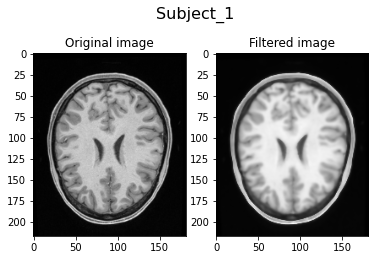

Filtering Subject_2...


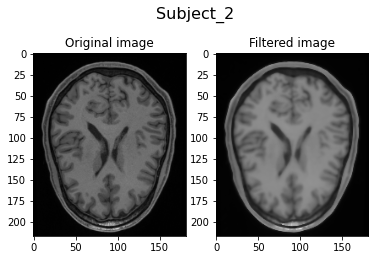

Filtering Subject_3...


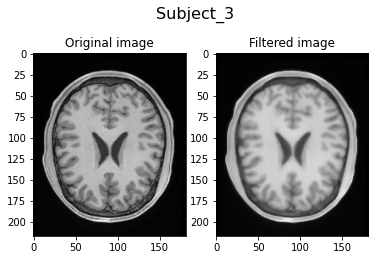

Filtering Subject_4...


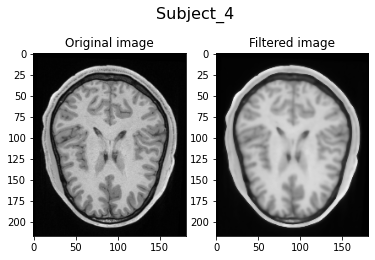

In [5]:
# get subjects to evaluate
subject_dirs = [subject for subject in glob.glob(os.path.join(data_dir, '*')) if os.path.isdir(subject)]

for subject_dir in subject_dirs:
    subject_id = os.path.basename(subject_dir)
    print(f'Filtering {subject_id}...')

    # load the T1- and T2-weighted MR images
    t1_image = sitk.ReadImage(os.path.join(subject_dir, f'{subject_id}_T1.mha'))
    t2_image = sitk.ReadImage(os.path.join(subject_dir, f'{subject_id}_T2.mha'))

    # set the T2-weighted MR image as reference for the histogram matching
    pipeline.set_param(prep.HistogramMatcherParams(t2_image), histogram_matching_filter_idx)

    # execute filtering pipeline on the T1-weighted image
    filtered_t1_image = pipeline.execute(t1_image)

    # plot filtering result
    slice_no_for_plot = t1_image.GetSize()[2] // 2
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(sitk.GetArrayFromImage(t1_image[:, :, slice_no_for_plot]), cmap='gray')
    axs[0].set_title('Original image')
    axs[1].imshow(sitk.GetArrayFromImage(filtered_t1_image[:, :, slice_no_for_plot]), cmap='gray')
    axs[1].set_title('Filtered image')
    fig.suptitle(f'{subject_id}', fontsize=16)
    plt.show()

Visually, we can clearly see the smoothing of the filtered image due to the anisotrophic filtering. Also, the image intensites are brighter due to the histogram matching.

Visually, we can clearly see the smoothing of the filtered compared to the original image due to the anisotrophic filtering. Also, the image intensites are brighter due to the histogram matching.